# Training Data

In [2]:
import json

path = 'C:/Users/ujjwa/OneDrive/Documents/E yantra sample/annotations_trainval2017/annotations/instances_train2017.json'
file = open(path)
anns = json.load(file)
anns.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [4]:
anns['categories'][0]

{'supercategory': 'person', 'id': 1, 'name': 'person'}

In [6]:
anns['images'][0]

{'license': 3,
 'file_name': '000000391895.jpg',
 'coco_url': 'http://images.cocodataset.org/train2017/000000391895.jpg',
 'height': 360,
 'width': 640,
 'date_captured': '2013-11-14 11:18:45',
 'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg',
 'id': 391895}

In [8]:
anns['annotations'][0]

{'segmentation': [[239.97,
   260.24,
   222.04,
   270.49,
   199.84,
   253.41,
   213.5,
   227.79,
   259.62,
   200.46,
   274.13,
   202.17,
   277.55,
   210.71,
   249.37,
   253.41,
   237.41,
   264.51,
   242.54,
   261.95,
   228.87,
   271.34]],
 'area': 2765.1486500000005,
 'iscrowd': 0,
 'image_id': 558840,
 'bbox': [199.84, 200.46, 77.71, 70.88],
 'category_id': 58,
 'id': 156}

In [10]:
print(len(anns['annotations']))
print(len(anns['images']))

860001
118287


In [12]:
df_dict = {'file_name':[],
           'id':[]}
for i in anns['images']:
    df_dict['file_name'].append(i['file_name'])
    df_dict['id'].append(i['id'])

Dictionary for category id and class name

In [15]:
category = {1:"Person",
            0:"Other"}

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
image_info = pd.DataFrame(df_dict)

In [19]:
class_dict = {}
image_info['class'] = 0
for i in image_info['id']:
    class_dict[i] = []

for i in anns['annotations']:
    class_dict[i['image_id']].append(i['category_id'])

In [23]:
for i in class_dict.keys():
    if 1 in class_dict[i]:
        class_dict[i] = 1
    else:
        class_dict[i] = 0 

In [25]:
image_info['class'] = class_dict.values()

In [27]:
image_info['class_name'] = image_info['class'].apply(lambda x:category[x])

In [29]:
image_info.value_counts('class_name')

class_name
Person    64115
Other     54172
Name: count, dtype: int64

In [31]:
image_info

,file_name,id,class,class_name
0,000000391895.jpg,391895,1,Person
1,000000522418.jpg,522418,1,Person
2,000000184613.jpg,184613,1,Person
3,000000318219.jpg,318219,1,Person
4,000000554625.jpg,554625,1,Person
...,...,...,...,...
118282,000000444010.jpg,444010,1,Person
118283,000000565004.jpg,565004,1,Person
118284,000000516168.jpg,516168,1,Person
118285,000000547503.jpg,547503,1,Person


# Validation

In [34]:
import json

path = 'C:/Users/ujjwa/OneDrive/Documents/E yantra sample/annotations_trainval2017/annotations/instances_val2017.json'
file = open(path)
val_anns = json.load(file)
val_anns.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [36]:
df_dict = {'file_name':[],
           'id':[]}
for i in val_anns['images']:
    df_dict['file_name'].append(i['file_name'])
    df_dict['id'].append(i['id'])

In [38]:
val_image_info = pd.DataFrame(df_dict)

In [40]:
class_dict = {}
val_image_info['class'] = 0
for i in val_image_info['id']:
    class_dict[i] = []

for i in val_anns['annotations']:
    class_dict[i['image_id']].append(i['category_id'])

In [42]:
for i in class_dict.keys():
    if 1 in class_dict[i]:
        class_dict[i] = 1
    else:
        class_dict[i] = 0 

In [44]:
val_image_info['class'] = class_dict.values()

In [46]:
val_image_info['class_name'] = val_image_info['class'].apply(lambda x:category[x])

In [48]:
val_image_info.value_counts('class_name')

class_name
Person    2693
Other     2307
Name: count, dtype: int64

In [50]:
val_image_info

,file_name,id,class,class_name
0,000000397133.jpg,397133,1,Person
1,000000037777.jpg,37777,0,Other
2,000000252219.jpg,252219,1,Person
3,000000087038.jpg,87038,1,Person
4,000000174482.jpg,174482,0,Other
...,...,...,...,...
4995,000000512403.jpg,512403,0,Other
4996,000000168974.jpg,168974,1,Person
4997,000000552775.jpg,552775,1,Person
4998,000000394940.jpg,394940,1,Person


In [52]:
image_info

,file_name,id,class,class_name
0,000000391895.jpg,391895,1,Person
1,000000522418.jpg,522418,1,Person
2,000000184613.jpg,184613,1,Person
3,000000318219.jpg,318219,1,Person
4,000000554625.jpg,554625,1,Person
...,...,...,...,...
118282,000000444010.jpg,444010,1,Person
118283,000000565004.jpg,565004,1,Person
118284,000000516168.jpg,516168,1,Person
118285,000000547503.jpg,547503,1,Person


In [6]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
import datetime


In [94]:
X = image_info.drop("class_name",axis=1)
y = image_info['class_name']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2356, shuffle=True, stratify=y)

In [98]:
X_test['class_name'] = y_test

In [100]:
train_datagen = ImageDataGenerator(rescale=1.0 / 255)
val_datagen = ImageDataGenerator(rescale=1.0 / 255)

In [102]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe = X_test.drop(["id","class"],axis = 1),
    directory = 'C:/Users/ujjwa/OneDrive/Documents/E yantra sample/train2017/train2017/',
    x_col = 'file_name',
    y_col = 'class_name',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe = val_image_info.drop(["id","class"],axis = 1),
    directory = 'C:/Users/ujjwa/OneDrive/Documents/E yantra sample/val2017/val2017/',
    x_col = 'file_name',
    y_col = 'class_name',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary',
    shuffle = False
)

Found 27869 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [104]:
base_model = ResNet50(weights='imagenet', include_top=False,input_shape=(224, 224, 3))

In [105]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation = 'relu')(x)
prediction = Dense(1, activation = 'sigmoid')(x)

In [108]:
model = Model(inputs=base_model.input, outputs=prediction)

In [110]:
for layer in base_model.layers:
    layer.trainable = False

In [112]:
for layer in base_model.layers[-10:]:
    layer.trainable = True

In [114]:
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [116]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [118]:
early_stopping_callback = EarlyStopping(
    monitor='val_accuracy', patience=5, restore_best_weights=True
)

In [120]:


lr_schedule = ReduceLROnPlateau(
    monitor='val_loss',  # Metric to monitor
    factor=0.1,          # Reduce learning rate by this factor
    patience=5,          # Number of epochs with no improvement to wait
    min_lr=1e-4,         # Minimum learning rate
    verbose=1            # Prints a message when learning rate is reduced
)


In [122]:
model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[tensorboard_callback, early_stopping_callback,lr_schedule],
)

Epoch 1/10
871/871 [==============================] - 2308s 3s/step - loss: 0.6344 - accuracy: 0.6349 - val_loss: 0.6237 - val_accuracy: 0.6416 - lr: 1.0000e-04
Epoch 2/10
871/871 [==============================] - 2441s 3s/step - loss: 0.5991 - accuracy: 0.6747 - val_loss: 0.6074 - val_accuracy: 0.6736 - lr: 1.0000e-04
Epoch 3/10
871/871 [==============================] - 2523s 3s/step - loss: 0.5847 - accuracy: 0.6852 - val_loss: 0.6169 - val_accuracy: 0.6658 - lr: 1.0000e-04
Epoch 4/10
871/871 [==============================] - 2449s 3s/step - loss: 0.5740 - accuracy: 0.6934 - val_loss: 0.7092 - val_accuracy: 0.5950 - lr: 1.0000e-04
Epoch 5/10
871/871 [==============================] - 2391s 3s/step - loss: 0.5620 - accuracy: 0.7063 - val_loss: 0.5927 - val_accuracy: 0.6832 - lr: 1.0000e-04
Epoch 6/10
871/871 [==============================] - 2380s 3s/step - loss: 0.5506 - accuracy: 0.7111 - val_loss: 0.5949 - val_accuracy: 0.6762 - lr: 1.0000e-04
Epoch 7/10
871/871 [==============

In [126]:
model.save("gyatt")

INFO:tensorflow:Assets written to: gyatt\assets


INFO:tensorflow:Assets written to: gyatt\assets


In [44]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('C:/Users/ujjwa/OneDrive/Documents/E yantra sample/Ai/gyatt/')

def preprocess_frame(frame, target_size=(224, 224)):
    """
    Resize and normalize the frame to match the model's input.
    """
    frame_resized = cv2.resize(frame, target_size)
    frame_normalized = frame_resized / 255.0  # Normalize pixel values to [0, 1]
    frame_batch = np.expand_dims(frame_normalized, axis=0)  # Add batch dimension
    return frame_batch

# Open the webcam
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not access the webcam.")
    exit()

print("Press 'q' to exit.")

while True:
    # Capture a frame from the webcam
    ret, frame = cap.read()
    if not ret:
        print("Error: Could not read a frame from the webcam.")
        break

    # Preprocess the frame for the model
    processed_frame = preprocess_frame(frame)

    # Predict using the model
    prediction = model.predict(processed_frame)[0][0]  # Get the sigmoid output

    # Check if a person is detected
    if prediction > 0.3:  # Adjust threshold if needed
        print("Person detected!")

    # Display the frame
    cv2.imshow('Webcam Feed', frame)

    # Exit the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close the window
cap.release()
cv2.destroyAllWindows()

Press 'q' to exit.
1/1 [==============================] - 0s 96ms/step
Person detected!
1/1 [==============================] - 0s 98ms/step
Person detected!
1/1 [==============================] - 0s 95ms/step
Person detected!
1/1 [==============================] - 0s 103ms/step
Person detected!
1/1 [==============================] - 0s 101ms/step
Person detected!
1/1 [==============================] - 0s 97ms/step
Person detected!
1/1 [==============================] - 0s 96ms/step


In [36]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def preprocess_image(image_path, target_size=(224, 224)):
    """
    Load an image, resize it, normalize pixel values, and prepare it for prediction.
    """
    # Load the image in RGB format
    image = load_img(image_path, target_size=target_size)  # Resizes the image
    image_array = img_to_array(image)  # Convert to numpy array
    image_normalized = image_array / 255.0  # Normalize pixel values to [0, 1]
    image_batch = np.expand_dims(image_normalized, axis=0)  # Add batch dimension
    return image_batch

# Path to the image you want to predict
image_path = "C:/Users/ujjwa/Downloads/person.jpeg"  # Update with your image file path

# Preprocess the image
preprocessed_image = preprocess_image(image_path)

# Make a prediction
prediction = model.predict(preprocessed_image)[0][0]  # Get sigmoid output

# Interpret the prediction
if prediction > 0.5:
    print(f"Prediction: Person detected with probability {prediction:.2f}")
else:
    print(f"Prediction: No person detected with probability {1 - prediction:.2f}")

1/1 [==============================] - 0s 100ms/step
Prediction: Person detected with probability 1.00


In [30]:
model.predict(preprocessed_image)[0][0]

1/1 [==============================] - 0s 105ms/step


0.9953911

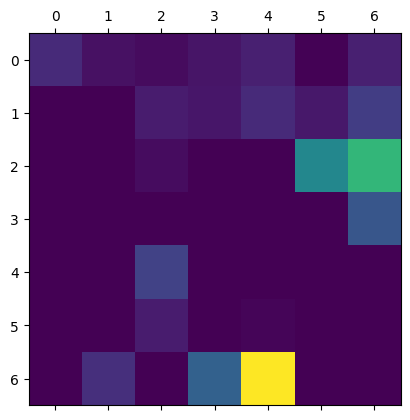

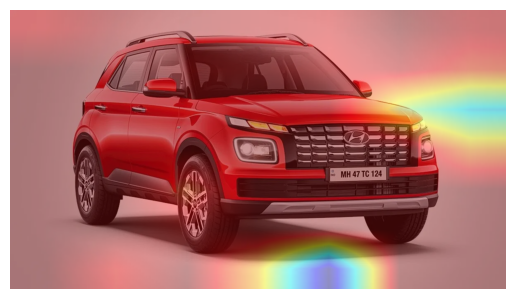

In [56]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array



# Load and preprocess the image
image_path = 'C:/Users/ujjwa/Downloads/Hyundai-Venue-2022.jpeg'
image = load_img(image_path, target_size=(224, 224))  # Adjust target_size to your model's input size
image_array = img_to_array(image)
image_array = np.expand_dims(image_array, axis=0) / 255.0  # Normalize the image

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Get the model's last convolutional layer
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Compute gradients
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    # Compute the gradient of the predicted class with respect to the outputs of the last conv layer
    grads = tape.gradient(class_channel, conv_outputs)

    # Compute the mean intensity of the gradients across the filters
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each filter output by its gradient
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)

    # Apply ReLU to the heatmap (remove negative values)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

    return heatmap.numpy()

# Specify the name of the last convolutional layer in your model
last_conv_layer_name = 'conv5_block3_out'  # Replace with your model's last conv layer

# Generate the heatmap
heatmap = make_gradcam_heatmap(image_array, model, last_conv_layer_name)

# Display the heatmap
plt.matshow(heatmap)
plt.show()

# Overlay the heatmap on the original image
import cv2

def overlay_heatmap(img_path, heatmap, alpha=0.4, colormap=cv2.COLORMAP_JET):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, colormap)
    overlayed_img = cv2.addWeighted(img, 1 - alpha, heatmap, alpha, 0)
    return overlayed_img

overlayed_image = overlay_heatmap(image_path, heatmap)
plt.imshow(overlayed_image)
plt.axis('off')
plt.show()
